In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm as lgb

In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
data = pd.read_parquet('/main/data/MVideo_2/dataset_main_6_w_1.parquet')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1163328 entries, 0 to 1163327
Data columns (total 65 columns):
STORE_ID                                          1163328 non-null category
PRODUCT_ID                                        1163328 non-null category
DATE                                              1163328 non-null datetime64[ns]
REGULAR_SALES_PRICE_INCL_TAX                      1163328 non-null int32
MAINCATEGORY_ID                                   1163328 non-null category
SUBCATEGORY_ID                                    1163328 non-null category
REGION                                            1163328 non-null category
INTERNET                                          1163328 non-null category
WEEK(DATE)                                        1163328 non-null category
MONTH(DATE)                                       1163328 non-null category
category.SUM(trans.REVENUE_INCL_TAX_P)_W8         1163328 non-null float32
category.STD(trans.UNITS_SOLD_P)_DIFF_W0         

In [5]:
data_train = data[data.DATE < '2018-01-28']

In [6]:
data_train.shape[0]

894852

In [7]:
data_train2 = data[data.DATE < '2018-03-18']

In [8]:
data_train2.shape[0]

1128538

In [9]:
data_val = data[(data.DATE >= '2018-01-28') & (data.DATE < '2018-03-18')]

In [10]:
data_val.shape[0]

233686

In [11]:
data_test = data[data.DATE == '2018-03-18']

In [12]:
data_test.shape[0]

34790

In [13]:
feat = [s for s in data.columns if s not in ['DATE', 'UNITS_SOLD_P1']]

In [14]:
dts = lgb.Dataset(data_train[feat], label = data_train.UNITS_SOLD_P1)

In [15]:
dts = dts.construct()

In [16]:
dtsv = dts.create_valid(data_val[feat], label = data_val.UNITS_SOLD_P1)

In [17]:
params = {'application': 'regression_l2',
 'learning_rate': 0.01,
 'num_leaves': 127,
 'min_data_in_leaf': 830,
 'min_sum_hessian_in_leaf': 0.01,
 'feature_fraction': 0.6,
 'bagging_fraction': 0.7,
 'bagging_freq': 0,
 'lambda_l2': 1.1286,
 'metric': 'l2_root'}

In [18]:
bst = lgb.train(params, dts, valid_sets = [dtsv], valid_names = ['Validation'],
                num_boost_round = 10000, early_stopping_rounds = 20)

[1]	Validation's rmse: 0.840139
Training until validation scores don't improve for 20 rounds.
[2]	Validation's rmse: 0.838147
[3]	Validation's rmse: 0.836079
[4]	Validation's rmse: 0.834008
[5]	Validation's rmse: 0.831897
[6]	Validation's rmse: 0.82997
[7]	Validation's rmse: 0.827885
[8]	Validation's rmse: 0.826022
[9]	Validation's rmse: 0.824026
[10]	Validation's rmse: 0.822438
[11]	Validation's rmse: 0.820716
[12]	Validation's rmse: 0.818917
[13]	Validation's rmse: 0.817238
[14]	Validation's rmse: 0.815427
[15]	Validation's rmse: 0.8135
[16]	Validation's rmse: 0.811685
[17]	Validation's rmse: 0.810145
[18]	Validation's rmse: 0.808313
[19]	Validation's rmse: 0.806892
[20]	Validation's rmse: 0.805281
[21]	Validation's rmse: 0.803768
[22]	Validation's rmse: 0.802232
[23]	Validation's rmse: 0.800523
[24]	Validation's rmse: 0.799206
[25]	Validation's rmse: 0.797753
[26]	Validation's rmse: 0.79639
[27]	Validation's rmse: 0.7949
[28]	Validation's rmse: 0.793529
[29]	Validation's rmse: 0.792

[249]	Validation's rmse: 0.71282
[250]	Validation's rmse: 0.712773
[251]	Validation's rmse: 0.712714
[252]	Validation's rmse: 0.712663
[253]	Validation's rmse: 0.71264
[254]	Validation's rmse: 0.712577
[255]	Validation's rmse: 0.712499
[256]	Validation's rmse: 0.712479
[257]	Validation's rmse: 0.712488
[258]	Validation's rmse: 0.712448
[259]	Validation's rmse: 0.712351
[260]	Validation's rmse: 0.712308
[261]	Validation's rmse: 0.712265
[262]	Validation's rmse: 0.712251
[263]	Validation's rmse: 0.712173
[264]	Validation's rmse: 0.712162
[265]	Validation's rmse: 0.712152
[266]	Validation's rmse: 0.712108
[267]	Validation's rmse: 0.712101
[268]	Validation's rmse: 0.7121
[269]	Validation's rmse: 0.712058
[270]	Validation's rmse: 0.712021
[271]	Validation's rmse: 0.711992
[272]	Validation's rmse: 0.712012
[273]	Validation's rmse: 0.711991
[274]	Validation's rmse: 0.711987
[275]	Validation's rmse: 0.711963
[276]	Validation's rmse: 0.711917
[277]	Validation's rmse: 0.71192
[278]	Validation's 

[493]	Validation's rmse: 0.709145
[494]	Validation's rmse: 0.709144
[495]	Validation's rmse: 0.709138
[496]	Validation's rmse: 0.709133
[497]	Validation's rmse: 0.709122
[498]	Validation's rmse: 0.709122
[499]	Validation's rmse: 0.709136
[500]	Validation's rmse: 0.709131
[501]	Validation's rmse: 0.709096
[502]	Validation's rmse: 0.709075
[503]	Validation's rmse: 0.70906
[504]	Validation's rmse: 0.709063
[505]	Validation's rmse: 0.709099
[506]	Validation's rmse: 0.709104
[507]	Validation's rmse: 0.709096
[508]	Validation's rmse: 0.709135
[509]	Validation's rmse: 0.709132
[510]	Validation's rmse: 0.709125
[511]	Validation's rmse: 0.709125
[512]	Validation's rmse: 0.709136
[513]	Validation's rmse: 0.709151
[514]	Validation's rmse: 0.709148
[515]	Validation's rmse: 0.709146
[516]	Validation's rmse: 0.709142
[517]	Validation's rmse: 0.709158
[518]	Validation's rmse: 0.709151
[519]	Validation's rmse: 0.709167
[520]	Validation's rmse: 0.709162
[521]	Validation's rmse: 0.709163
[522]	Validatio

In [19]:
pred = bst.predict(data_test[feat])

In [22]:
np.sqrt(mean_squared_error(data_test.UNITS_SOLD_P1, pred))

0.6959575902190719

In [23]:
mean_absolute_error(data_test.UNITS_SOLD_P1, pred)

0.37532501132397544

In [24]:
pred2 = bst.predict(data_val[feat])

In [25]:
res = data_val[['DATE', 'PRODUCT_ID', 'STORE_ID', 'UNITS_SOLD_P1']].copy()

In [26]:
res['PRED_P1'] = pred2

In [27]:
def plot_ts(df, store_id, product_id):
    data_part = df[(df['STORE_ID'] == store_id) & (df['PRODUCT_ID'] == product_id)]
    week_range = data_part.DATE.drop_duplicates().sort_values().values
    #week_range = np.arange(data_part['DATE'].min(), data_part['DATE'].max())# + 1)
    ts = pd.DataFrame()
    ts['DATE'] = week_range
    df = pd.merge(ts, data_part, on = 'DATE', how = 'left')[['DATE', 'UNITS_SOLD_P1', 'PRED_P1']].fillna(0)
    plt.figure(figsize=(15, 4))
    plt.plot(df['DATE'].values, df['UNITS_SOLD_P1'].values, 'g^-', label='true')
    plt.plot(df['DATE'].values, df['PRED_P1'].values, 'ro-', label='pred')
    plt.xlabel('Week')
    plt.ylabel('Units sold')
    max_y = max(1, df['UNITS_SOLD_P1'].max(), df['PRED_P1'].max())
    plt.ylim((-0.05, max_y + 0.1))
    plt.title('The ts for product - %s and store - %s' % (product_id, store_id))
    plt.legend(loc='best')
    plt.show()

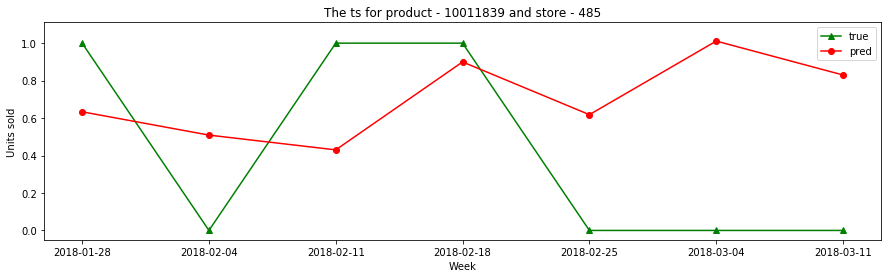

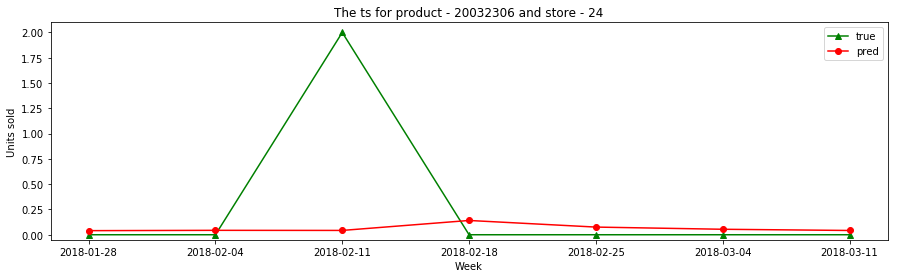

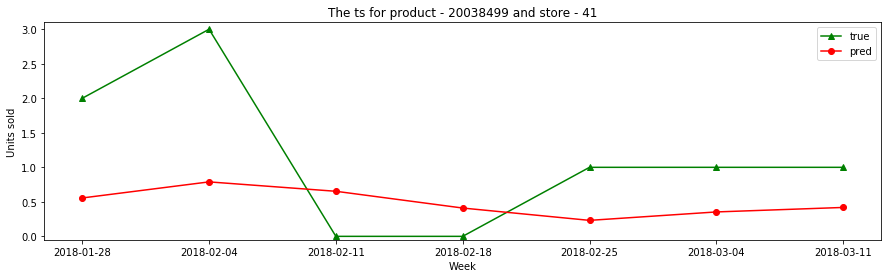

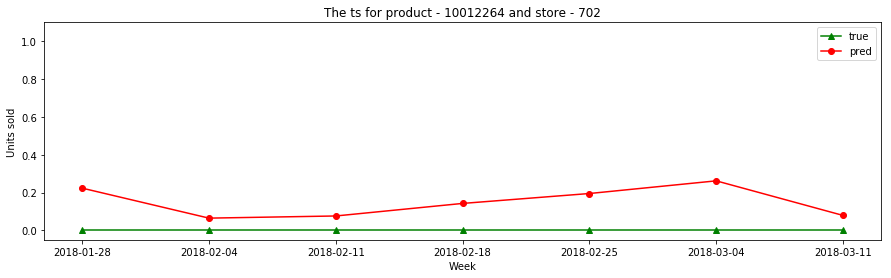

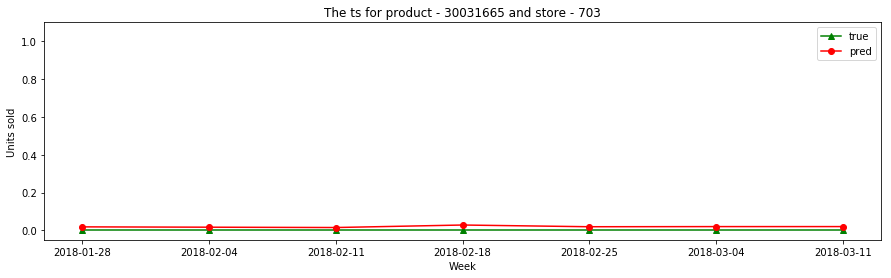

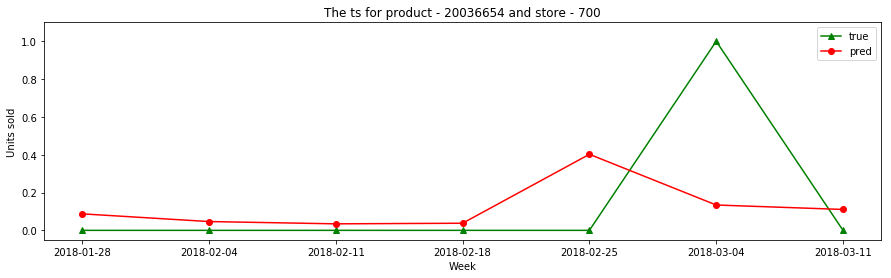

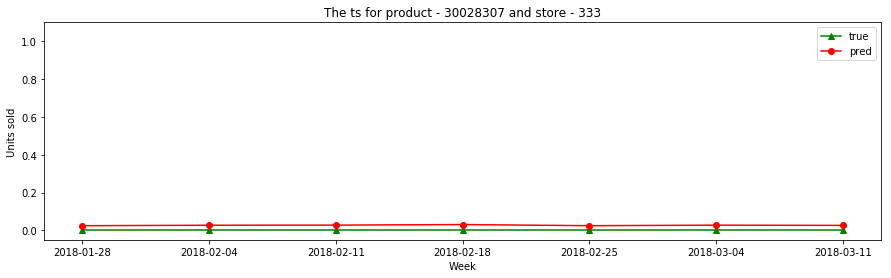

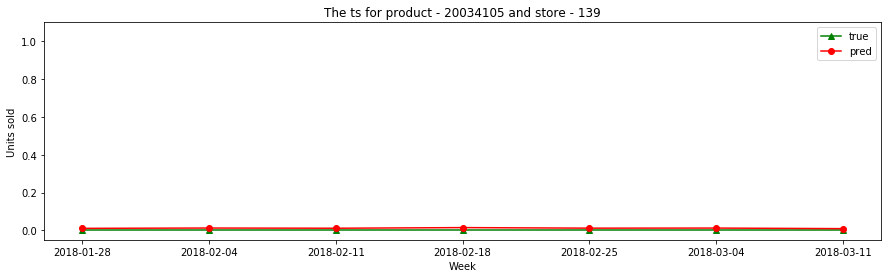

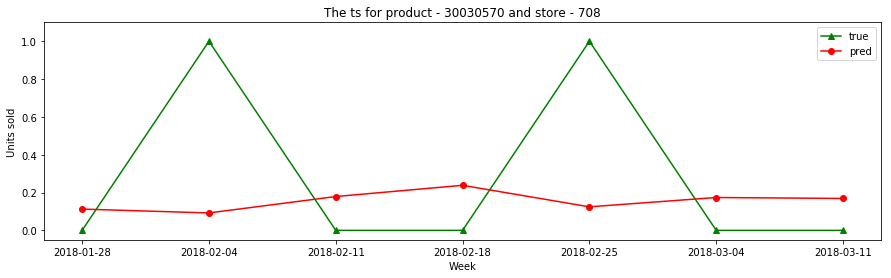

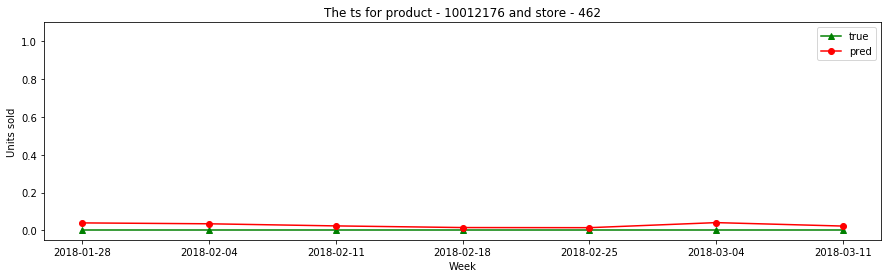

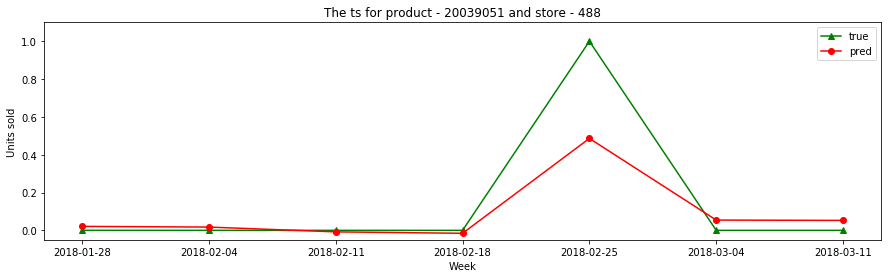

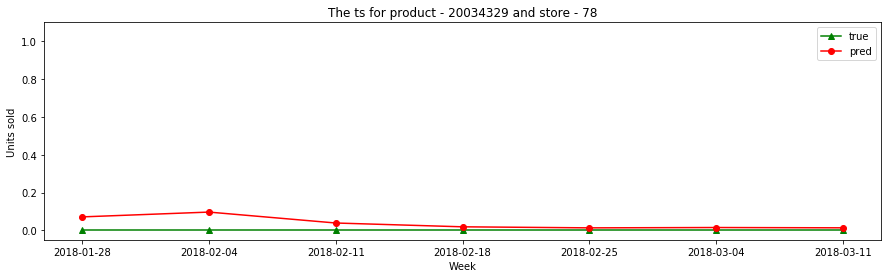

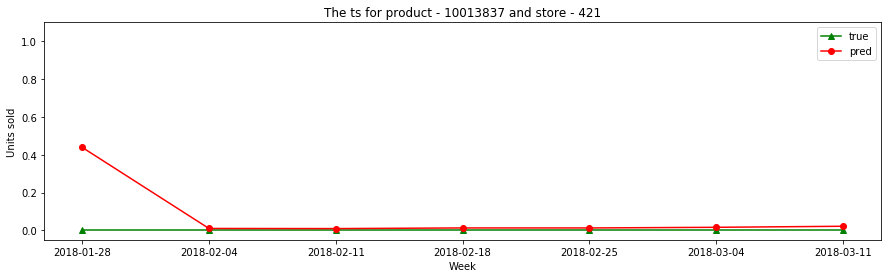

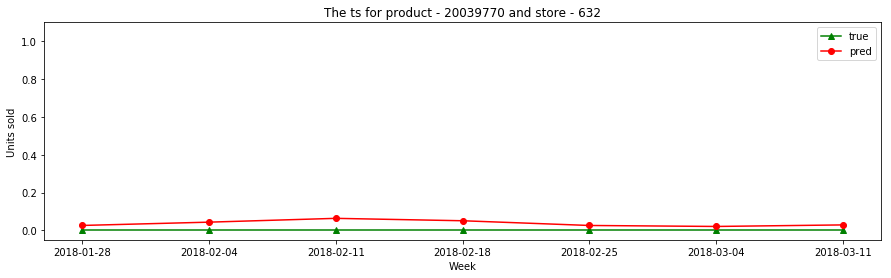

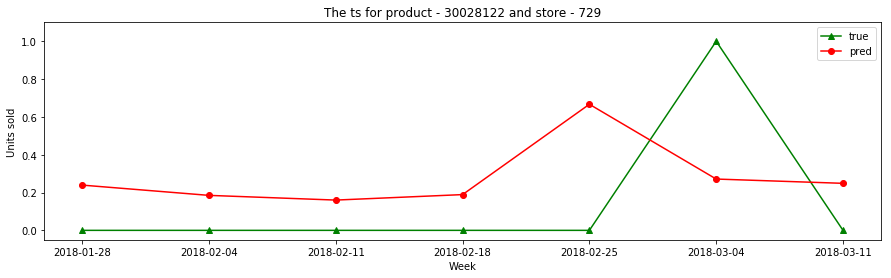

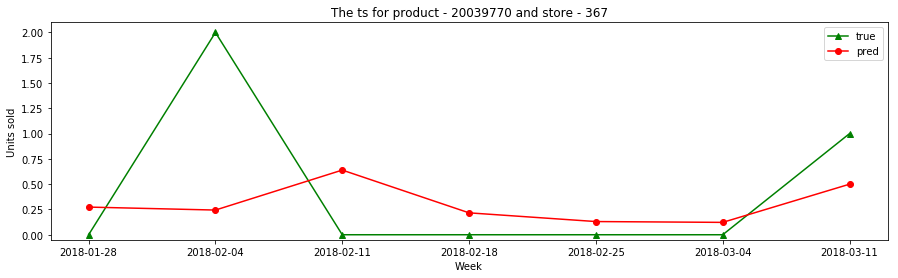

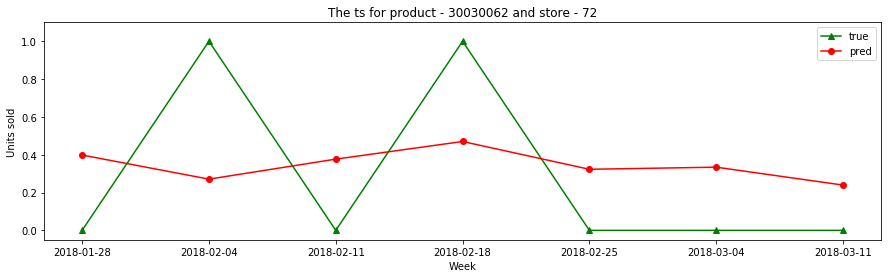

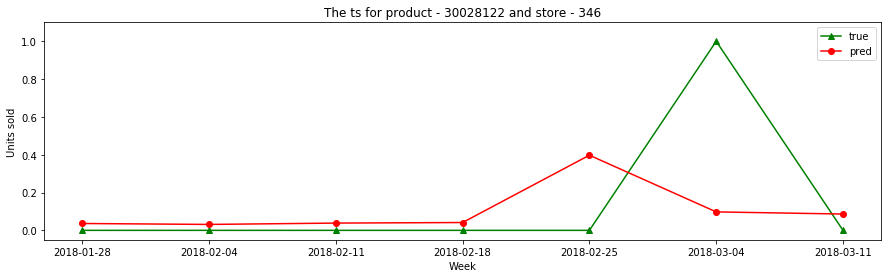

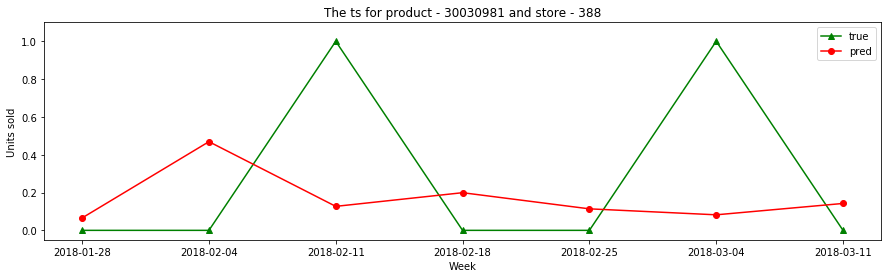

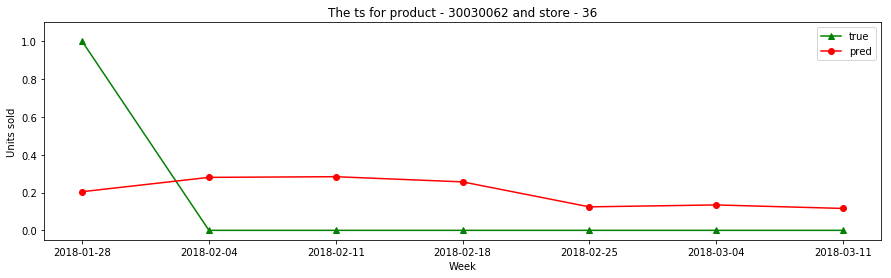

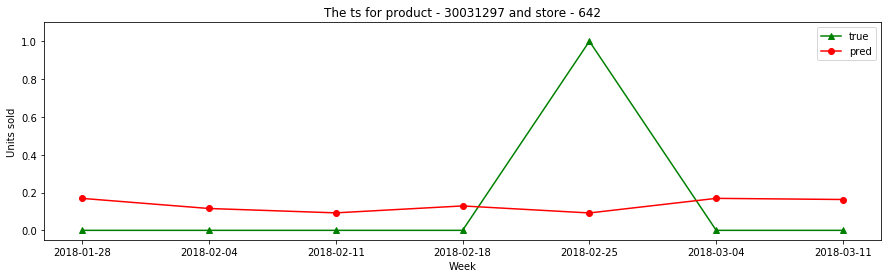

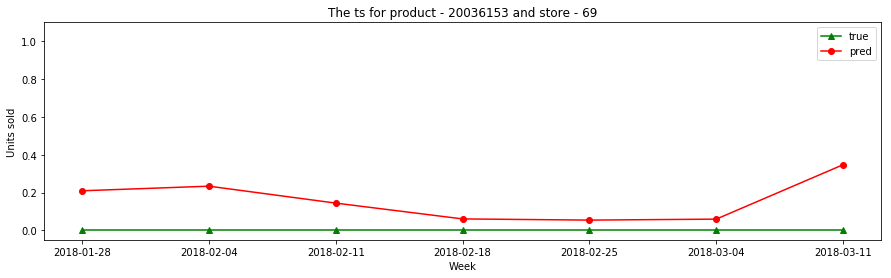

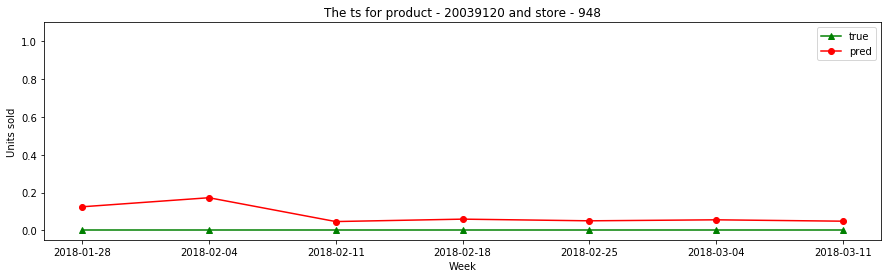

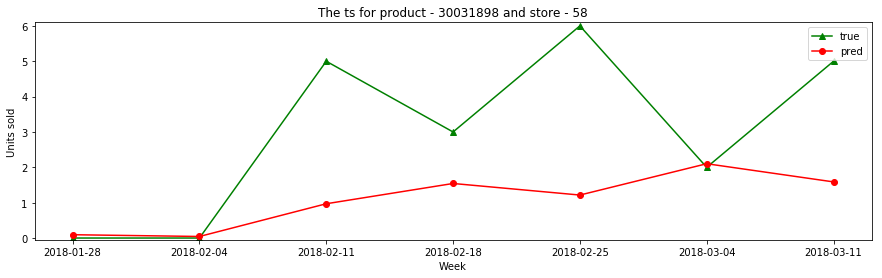

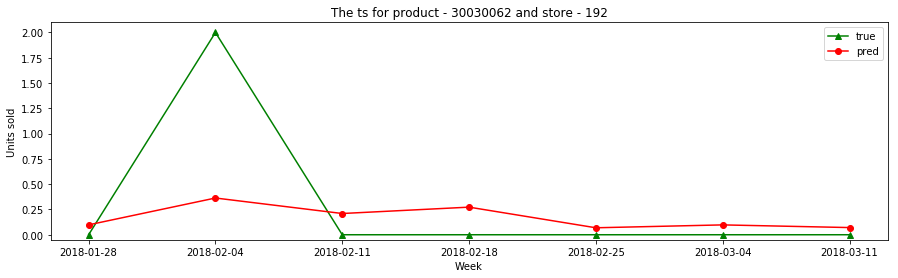

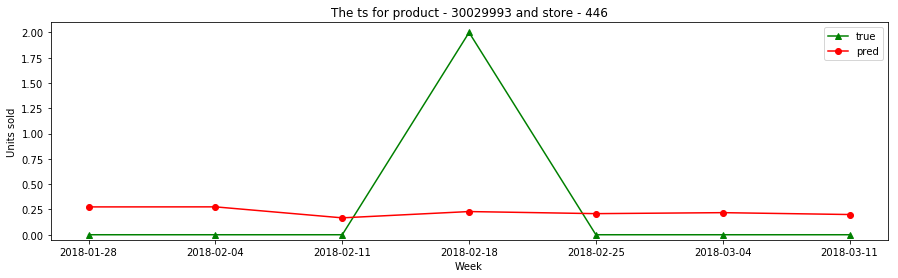

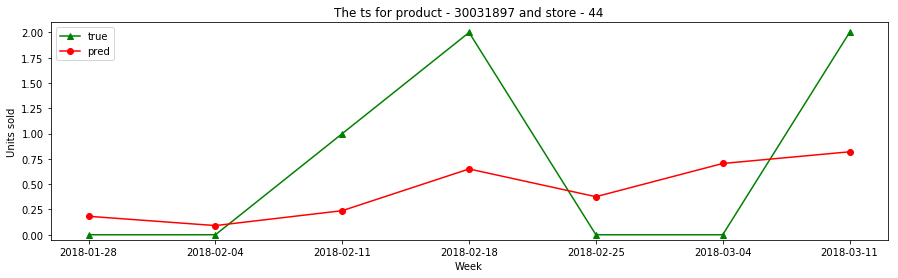

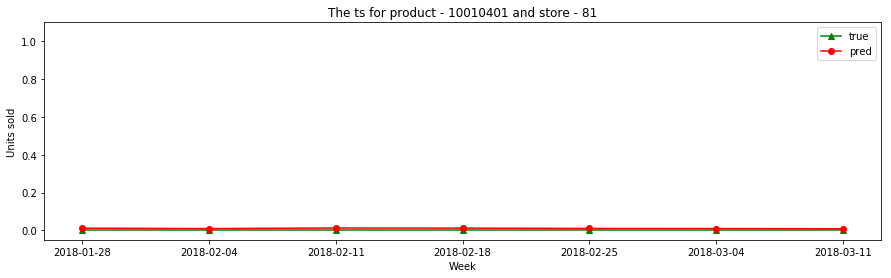

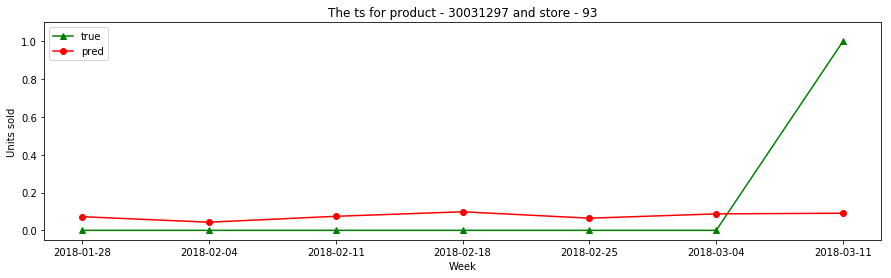

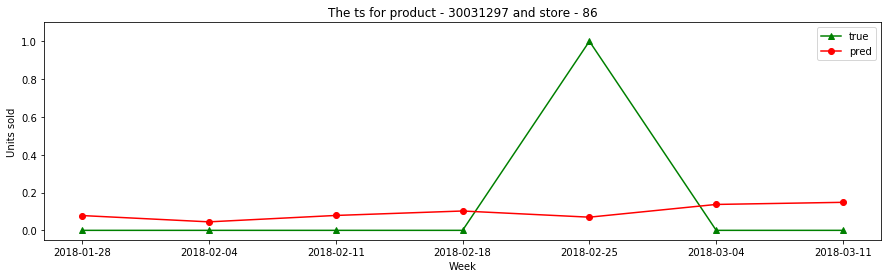

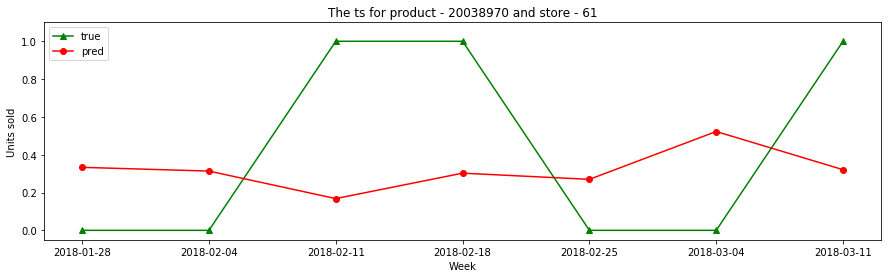

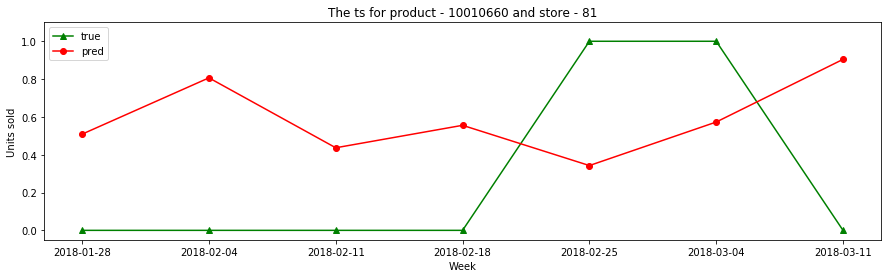

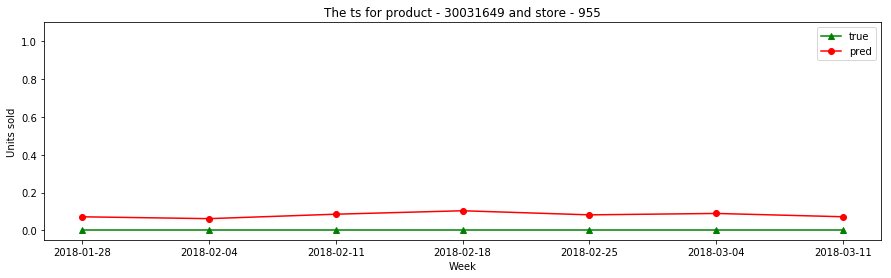

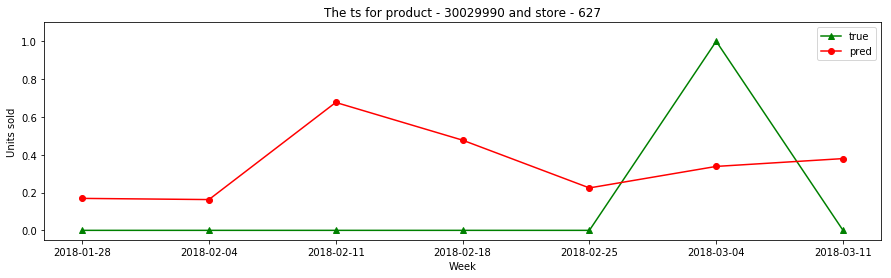

In [28]:
pairs = list(set(zip(res['STORE_ID'], res['PRODUCT_ID'])))

for i in range(len(pairs) // 1000):
    store_id, product_id = pairs[i]
    plot_ts(res, store_id, product_id)

In [29]:
dts2 = lgb.Dataset(data_train2[feat], label = data_train2.UNITS_SOLD_P1)

In [30]:
dts2 = dts2.construct()

In [33]:
bst.current_iteration()

503

In [34]:
bst2 = lgb.train(params, dts2, num_boost_round = bst.current_iteration())

In [35]:
pred3 = bst2.predict(data_test[feat])

In [36]:
np.sqrt(mean_squared_error(data_test.UNITS_SOLD_P1, pred3))

0.6794874995557627

In [37]:
mean_absolute_error(data_test.UNITS_SOLD_P1, pred3)

0.3669527243590047

In [38]:
sc = bst2.feature_importance(importance_type='gain')

In [39]:
score = pd.DataFrame(100 * sc / np.sum(sc),
                     index = bst2.feature_name(), columns = ['Score'])

In [40]:
score = score.sort_values('Score', ascending=False)

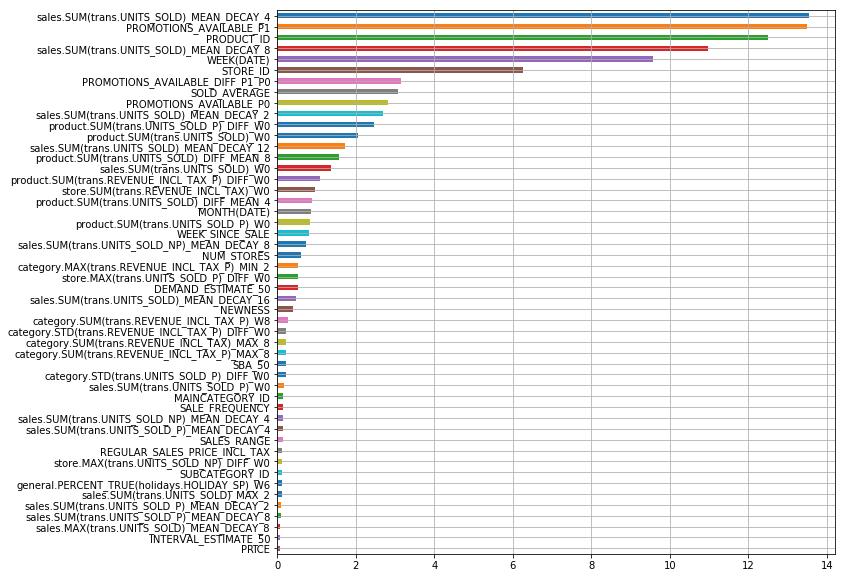

In [41]:
score.head(50).Score.plot.barh(grid=True, figsize=(10,10)).invert_yaxis()

In [42]:
res2 = data_test[['PRODUCT_ID', 'STORE_ID']].copy()

In [43]:
res2['PRED'] = pred3

In [44]:
res3 = pd.read_parquet('/main/data/MVideo_2/dataset_test_6.parquet')

In [46]:
res3 = res3[(res3.DATE == '2018-03-25')].copy()

In [47]:
res3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34790 entries, 0 to 34789
Data columns (total 4 columns):
STORE_ID      34790 non-null category
PRODUCT_ID    34790 non-null category
DATE          34790 non-null datetime64[ns]
UNITS_SOLD    34790 non-null float64
dtypes: category(2), datetime64[ns](1), float64(1)
memory usage: 1005.2 KB


In [48]:
res3 = res3.merge(res2)

In [49]:
res3.PRED.clip(lower = 0, inplace = True)

In [50]:
res3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34790 entries, 0 to 34789
Data columns (total 5 columns):
STORE_ID      34790 non-null category
PRODUCT_ID    34790 non-null category
DATE          34790 non-null datetime64[ns]
UNITS_SOLD    34790 non-null float64
PRED          34790 non-null float64
dtypes: category(2), datetime64[ns](1), float64(2)
memory usage: 1.2 MB


In [51]:
np.sqrt(mean_squared_error(res3.UNITS_SOLD, res3.PRED))

0.6794846600355566

In [52]:
mean_absolute_error(res3.UNITS_SOLD, res3.PRED)

0.36688373737159424

In [53]:
res3.to_parquet('/main/data/MVideo_2/results_6_w_1.parquet')